Setting up a fancy stylesheet

In [2]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
#from scipy.stats import bayes_mvs
from math import factorial
#import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings


sns.set(rc = {'lines.linewidth': 1.5, 'figure.figsize' : (10, 8)})
sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 2.0)
filterwarnings('ignore')

# Comparing the means of two groups

## Introduction

<p>One of the most common statistical tasks is to compare the means of two groups and to decide if they differ from each other in a statistically significant way.</p>
<p>For now we are going to look at very specific groups.  In essence the two groups are of nominal, categorical type.  In the first example below I want to see if there is a statistically significant difference between the admission white cell count (WCC) between those patients with and without histologically proven appendicitis.  Group A is then those without appendicitis and group B then include those with.  Groups A and B are categorical, but the actual data values are of ratio numerical type.  Later we will have a look at comparing two groups of numerical data.  This is called regression analysis.</p>

## Importing and examining the dataset

In [4]:
data = pd.read_csv('MOOC_Mock.csv') # Imporitng the csv file and attaching it to the computer variable (object) arbitrarily  called data

In [5]:
print(data.shape)
print(data.size)

(150, 17)
2550


In [6]:
data.tail(3) # This time looking at the bottom three entries using the .tail() function

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
147,148,54,Male,5,11,Yes,Yes,NaN,115,38.2,NaN,17.64,15.7,Yes,Yes,No,1
148,149,29,Male,4,6,No,Yes,45.0,133,41.2,163.5,15.50,19.2,Yes,Yes,Yes,9
149,150,55,Female,5,2,Yes,Yes,78.0,95,40.6,NaN,24.22,16.5,Yes,Yes,No,4


## Creating the two groups

<p>*Pandas* has a very powerful function called *.groupby()*.  In stead, though, I will simply create two new DataFrames here.</p>

In [7]:
appx_neg = data[data['Histo'] == 'No']
appx_pos = data[data['Histo'] == 'Yes']

<p>Let's have a quick descriptive look at our data.</p>

In [8]:
appx_neg['WCC'].describe()

count    29.000000
mean     11.544483
std       5.100563
min       4.220000
25%       7.700000
50%      10.910000
75%      14.530000
max      26.190000
Name: WCC, dtype: float64

In [9]:
appx_pos['WCC'].describe()

count    118.000000
mean      14.630254
std        4.607867
min        2.950000
25%       11.975000
50%       14.275000
75%       16.760000
max       26.400000
Name: WCC, dtype: float64

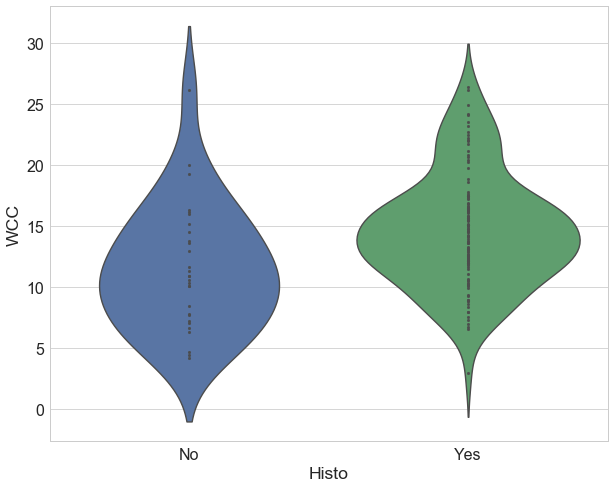

In [10]:
# drop rows with NA in column "WCC" or "Histo"
# data.dropna(subset=['WCC','Histo']).head(25)
sns.violinplot(y="WCC", x="Histo", data=data.dropna(subset=['WCC','Histo']), inner='pointer', order=['No','Yes'])

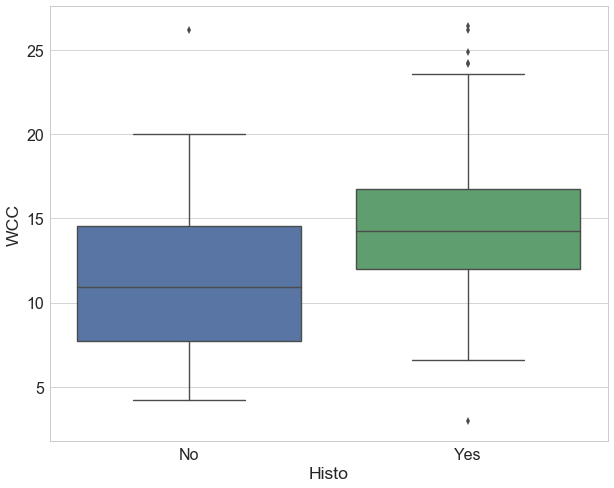

In [11]:
sns.boxplot(y="WCC", x="Histo", data=data.dropna(subset=['WCC','Histo']), order=['No','Yes'])

<p>Using the *.describe()* function for the **WCC** column we note that there are 29 values in the negative group and 118 in the positive group.  We simply want an answer to the question: Is there a significant difference in admission WCC between the groups?</p>

## Step 1 - Hypotheses

<p>This (and step 2) must happen before any data collection occurs!!!  Let's imagine for a moment that this is what happened!</p>
<p>Our null hypothesis is that there is no difference between the admission WCC in those with and without histologically proven acute appendicitis.</p>
<p>Our alternate or test hypothesis therefor will be that there is a difference.<p>

## Step 2 - Set alpha value

<p>As per usual, we'll go for 0.05.</p>
<p>This means we will construct a t distribution, convert the difference between the two means into a t-statistic and calculate the area under the curve from that point out (what was the probability of finding a value that extreme).  The alpha value (area) of 0.05 is split in two, with 0.025 on either side (by our null hypotheses, a two-tail test).

## Step 3 - Collect data

OK, done!

## Step 4 - Choose an appropriate statistical test

<p>Our sample values are of the ratio, numerical type.  We should therefore choose a type of t-test, for the fact that we don't know the population standard deviation or mean and have to construct a t distribution.</p>
<p>From the lecture on parametric and non-parametric tests you will remember that there are two types of t-tests.</p>
<p>A parametric t-test is used when the sample data is taken from a normal distribution and a non-parametric test is used when our sample data is not taken from a normal distribution.</p>
<p>Let's use the QQ plot to see if our data values for both groups come from normally distributed data.</p>

R square =  0.9727968261431319


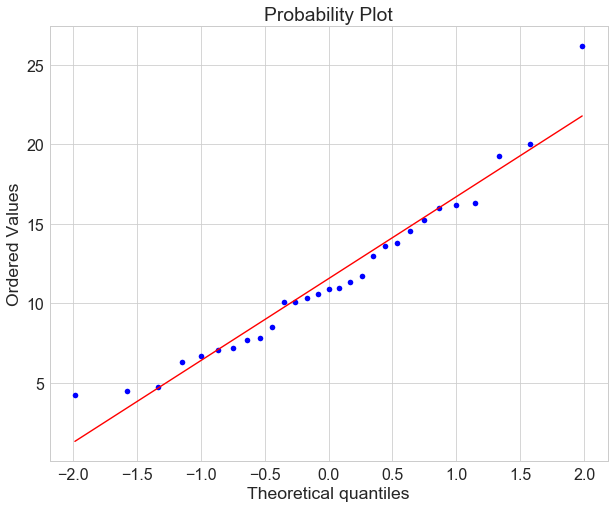

In [12]:
# from scipy.stats import probplot
res = stats.probplot(appx_neg['WCC'].dropna(), dist = 'norm', plot = plt);
print("R square = ", res[1][2])


R square =  0.9889630763616227


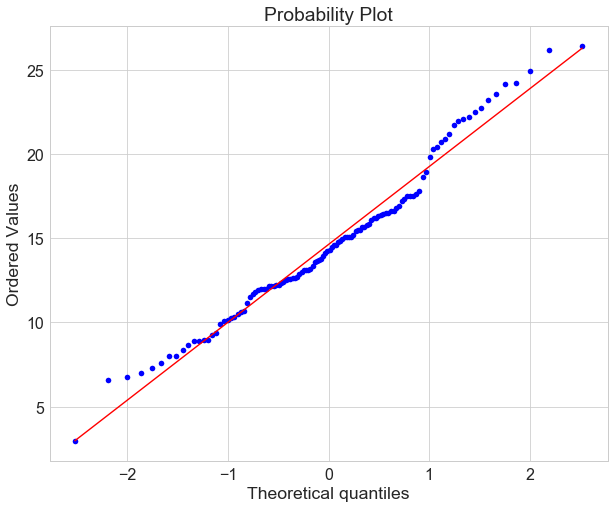

In [13]:
res = stats.probplot(appx_pos['WCC'].dropna(), dist = 'norm', plot = plt);
print("R square = ", res[1][2])

<p>We have *R<sup>2</sup>* values of *0.9728* and *0.9890*.  Fair to say that these two sample value sets come from normally distributed data.  We can therefore use Student's t-test.</p>
<p>One more thing.  The two groups are independent from each other.  So, to be precise, we'll use Student's t-test for independent groups.</p>
<p>It never ends!  One final-final thing.  We need to know if the two sample value sets share equal variances.  You see, there are t-test for equal and unequal variances.</p>

In [14]:
appx_neg['WCC'].var()

26.015747044334972

In [15]:
appx_pos['WCC'].var()

21.232438396349437

<p>Who is to say how close these two variances must be to each other.  Well, that's a judgement call.  Here we have *21* and *26*.  Probably close enough!</p>

## Step 5 - Do the analysis

<p>We are going to use the *stats.ttest_ind()* function.  It stands for t-test for independent groups.  The arguments are the values for the two groups (in no particular order) and whether the variances are equal or not.  If this last argument is not given, it defaults to true.</p>
<p>*stats.ttest_ind()* retruns two results.  The first is the actual t-statistic and the second is the *p*-value.  I therefore supply two computer variables names (of my choice).</p>

In [16]:
t_stat, p_val = stats.ttest_ind(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna(), equal_var = True)
p_val

0.0019024340692918912

In [17]:
t_stat

-3.1629936640352385

<p>There you have it.  A *p*-value of less than 0.05.  We can now state that there is a statistically significant difference between the admission WCC between our patients with and without histologically proven appendicitis.</p>

### For fun, let's look at other t-tests

#### t-test for unequal variances

<p>So imagine we decide the difference in the variance was too big.  Now we have to use a t-test for unequal variances.  This is simply done by setting the *equal_var* argument to *False*.  This test is also known as the Welch t-test, the Welch-Aspin test or two-sample unpooled t-test for unequal variances.  Let's see what the effect will be on the *p*-value.</p>

In [18]:
t_stat_unequal, p_val_unequal = stats.ttest_ind(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna(), equal_var = False)
# This time I set equal_var to False
p_val_unequal

0.004972269753330877

<p>Note that the *p*-value has changed from *0.0019* to *0.00497*.

#### Non-parametric t-test

<p>Suppose I decide by the QQ plot (not so in this case) that the values were not from a normal distribution.  I would then have to use a non-parametric t-test such as the Mann-Whitney-Wilcoxon rank sums or Mann-Whitney-U test.  The former is for paired (dependent) groups and the latter for unpaired groups such as what we have here.</p>

In [19]:
t_stat_U, p_val_U = stats.mannwhitneyu(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna())

In [20]:
p_val_U * 2

0.0014673245889847122

<p>A special note on the Mann-Whitney-U test.  It is only valid if there are at least 20 sample values in each group.  If you have less than 20, consider extending your research!</p>
<p>The *p*-value results is for a one-sided solution.  If you null hypothesis was for a two-tailed approach, then multiply the result by *2*.</p>